# IsoformSwitchAnalyzeR evaluation

- Author: Francisco M Martin Zamora
- Date: 8 to 10 Sep 2025

## 1. Objective

We want to evaluate and plot the results of the IsoformSwitchAnalyzeR data that was run on the `salmon` output.

## 2. Data preparation and loading

Load libraries of interest:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import glob

from mplcursors import cursor

Set relevant directories and paths to the files of interest:

In [19]:
hackathon_dir = "/weka/projects/bioinf/Data/hackathon_splicing"
suppa_dir = hackathon_dir + "/suppa2"
isoform_switch_analyzer_dir = hackathon_dir + "/isoform_switch_analyzer"
output_dir = hackathon_dir + "/short_read_methods_comparison"

In [20]:
isoform_switch_analyzer_quantification = pd.read_csv(isoform_switch_analyzer_dir + "/isoformRepIF_Illumina.csv", sep = ',', index_col=0)
isoform_switch_analyzer_differential_splicing = pd.read_csv(isoform_switch_analyzer_dir + "/isoform_deltaIF_Illumina.csv", sep = ',', index_col=0)
isoform_switch_analyzer_quantification.index.name = None
isoform_switch_analyzer_differential_splicing.index.name = None

Let's load a transcript to gene correspondence file too:

In [21]:
tx2gene = pd.read_csv("/home/fmartinzamora/datasets/altos-lab-bioinf/CI/Fran/" + \
    "hackathon_splicing/illumina_processed/star_salmon/tx2gene.tsv", sep="\t")
tx2geneid = tx2gene.set_index('transcript_id')['gene_id'].to_dict()
tx2genename = tx2gene.set_index('transcript_id')['gene_name'].to_dict()
geneid2name = tx2gene.set_index('gene_id')['gene_name'].to_dict()

Let's add the gene ID information to these objects:

In [22]:
isoform_switch_analyzer_quantification.index = [tx2geneid[i]+';'+i for i in isoform_switch_analyzer_quantification.index]
isoform_switch_analyzer_differential_splicing.index = [tx2geneid[i]+';'+i for i in isoform_switch_analyzer_differential_splicing.index]

Let's visualise the objects:

In [23]:
isoform_switch_analyzer_quantification

,SGNex_H9_Illumina_replicate2_run1,SGNex_H9_Illumina_replicate3_run1,SGNex_K562_Illumina_replicate3_run1,SGNex_K562_Illumina_replicate4_run1
ENSG00000237491;ENST00000457084,0.2824,0.2994,0.1701,0.0969
ENSG00000237491;ENST00000665867,0.0000,0.0279,0.0254,0.0000
ENSG00000237491;ENST00000669749,0.0000,0.0397,0.0000,0.0067
ENSG00000237491;ENST00000609830,0.2103,0.0000,0.0506,0.0538
ENSG00000237491;ENST00000443772,0.0269,0.0655,0.0034,0.0055
...,...,...,...,...
ENSG00000182484;ENST00000479401,0.2062,0.1429,0.0000,0.0089
ENSG00000182484;ENST00000492963,0.0729,0.0758,0.1645,0.1212
ENSG00000182484;ENST00000460206,0.1700,0.2500,0.1502,0.2009
ENSG00000182484;ENST00000482170,0.0000,0.0065,0.0141,0.0563


In [24]:
isoform_switch_analyzer_differential_splicing

,dIF,padj
ENSG00000237491;ENST00000457084,-0.15740,0.084451
ENSG00000237491;ENST00000665867,-0.00125,0.915252
ENSG00000237491;ENST00000669749,-0.01650,0.676967
ENSG00000237491;ENST00000609830,-0.05295,0.900783
ENSG00000237491;ENST00000443772,-0.04175,0.029540
...,...,...
ENSG00000182484;ENST00000479401,-0.17010,0.003974
ENSG00000182484;ENST00000492963,0.06850,0.015171
ENSG00000182484;ENST00000460206,-0.03445,0.701265
ENSG00000182484;ENST00000482170,0.03195,0.201083


Lastly, I'll import the expression levels of the isoforms in average log2(TPM) (from SUPPA, though):

In [26]:
suppa_dir

'/weka/projects/bioinf/Data/hackathon_splicing/suppa2'

In [27]:
avglogtpm = pd.read_csv(suppa_dir + "/salmon.differential_splicing_isoform_avglogtpm.tab", sep="\t", header = None, index_col=0)
avglogtpm.index.name = None
avglogtpm.rename(columns={1: "avglogtpm"}, inplace=True)
avglogtpm

,avglogtpm
ENSG00000160072;ENST00000673477,1.710206
ENSG00000160072;ENST00000472194,1.710206
ENSG00000160072;ENST00000378736,1.710206
ENSG00000160072;ENST00000485748,1.710206
ENSG00000160072;ENST00000474481,1.710206
...,...
ENSG00000278817;ENST00000613204,0.592495
ENSG00000276345;ENST00000612848,1.600278
ENSG00000271254;ENST00000614336,1.102053
ENSG00000271254;ENST00000612640,1.102053


## 3. Differential splicing visualisation

### 3.1. Per isoform

In [42]:
common_index_isoform = isoform_switch_analyzer_differential_splicing.index.intersection(avglogtpm.index)
ma_plot_data_isoform = pd.DataFrame({
    'dif': isoform_switch_analyzer_differential_splicing.loc[common_index_isoform].iloc[:, 0],
    'avglogtpm': avglogtpm.loc[common_index_isoform].iloc[:, 0]
})
ma_plot_data_isoform.loc[:, 'gene_name'] = [geneid2name[i.split(';')[0]] for i in ma_plot_data_isoform.index]
ma_plot_data_isoform_above_threshold = ma_plot_data_isoform.loc[ma_plot_data_isoform['avglogtpm'] > 0]

volcano_plot_data_isoform = pd.DataFrame({
    'dif': isoform_switch_analyzer_differential_splicing.loc[common_index_isoform].iloc[:, 0],
    'pval': isoform_switch_analyzer_differential_splicing.loc[common_index_isoform].iloc[:, 1]
})
volcano_plot_data_isoform_above_threshold = volcano_plot_data_isoform.loc[ma_plot_data_isoform['avglogtpm'] > 0]
volcano_plot_data_isoform_above_threshold.loc[:, 'gene_name'] = [geneid2name[i.split(';')[0]] for i in volcano_plot_data_isoform_above_threshold.index]

/tmp/ipykernel_6130/3714808323.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volcano_plot_data_isoform_above_threshold.loc[:, 'gene_name'] = [geneid2name[i.split(';')[0]] for i in volcano_plot_data_isoform_above_threshold.index]


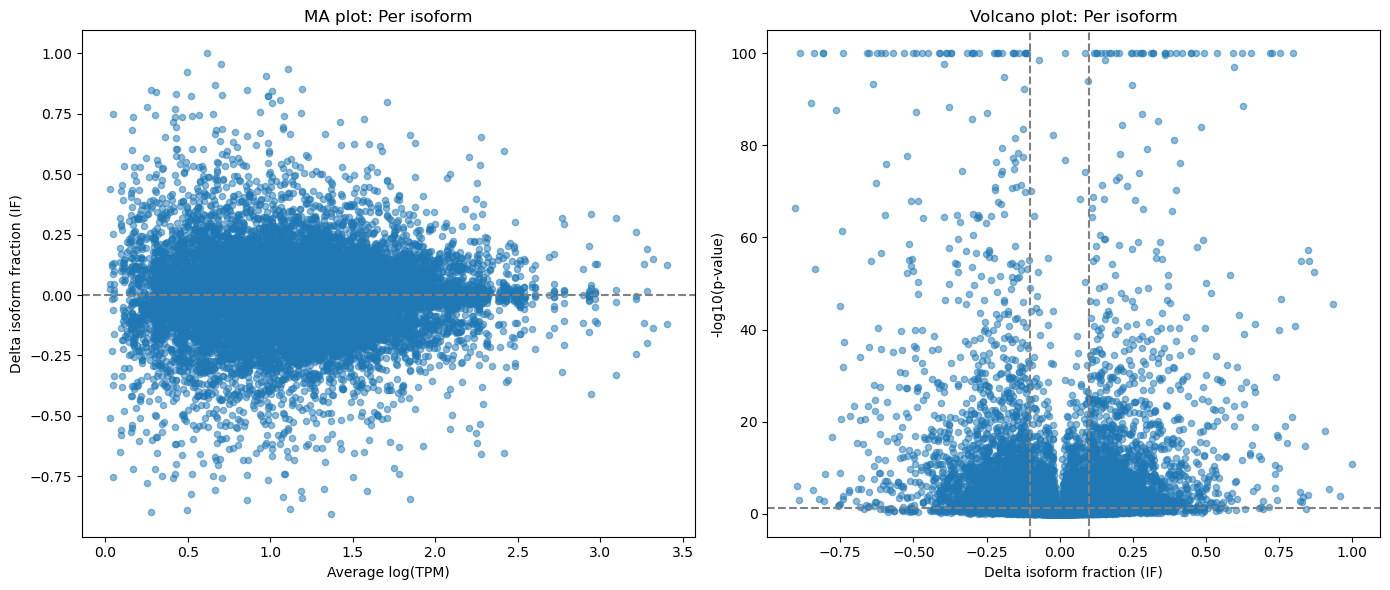

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# MA plot
axs[0].scatter(ma_plot_data_isoform_above_threshold['avglogtpm'], ma_plot_data_isoform_above_threshold['dif'], alpha=0.5, s=20)
axs[0].axhline(0, color='grey', linestyle='--')
axs[0].set_xlabel('Average log(TPM)')
axs[0].set_ylabel('Delta isoform fraction (IF)')
axs[0].set_title('MA plot: Per isoform')

# Volcano plot
# Use volcano_plot_data_isoform for dif and pval
dif = volcano_plot_data_isoform_above_threshold['dif']
pvals = volcano_plot_data_isoform_above_threshold['pval']
neglog10p = -np.log10(np.clip(pvals, 1e-100, 1))
axs[1].scatter(dif, neglog10p, alpha=0.5, s=20)
axs[1].set_xlabel('Delta isoform fraction (IF)')
axs[1].set_ylabel('-log10(p-value)')
axs[1].set_title('Volcano plot: Per isoform')
axs[1].axvline(-0.1, color='grey', linestyle='--')
axs[1].axvline(0.1, color='grey', linestyle='--')
axs[1].axhline(-np.log10(0.05), color='grey', linestyle='--')

plt.tight_layout()
plt.show()

In [47]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('MA plot: Per isoform', 'Volcano plot: Per isoform'),
                    horizontal_spacing=0.15)

# MA plot
fig.add_trace(
    go.Scatter(
        x=ma_plot_data_isoform_above_threshold['avglogtpm'],
        y=ma_plot_data_isoform_above_threshold['dif'],
        mode='markers',
        marker=dict(size=8, opacity=0.5),
        hovertemplate=
        'Gene: %{text}<br>' +
        'Average log(TPM): %{x:.2f}<br>' +
        'Delta PSI: %{y:.2f}<br>' +
        '<extra></extra>',
        text=ma_plot_data_isoform_above_threshold.index  # Using index as gene names
    ),
    row=1, col=1
)

# Add horizontal line at y=0 for MA plot
fig.add_shape(
    type="line", line=dict(dash="dash", color="grey"),
    x0=ma_plot_data_isoform_above_threshold['avglogtpm'].min(),
    x1=ma_plot_data_isoform_above_threshold['avglogtpm'].max(),
    y0=0, y1=0,
    row=1, col=1
)

# Volcano plot
dif = volcano_plot_data_isoform_above_threshold['dif']
pvals = volcano_plot_data_isoform_above_threshold['pval']
neglog10p = -np.log10(np.clip(pvals, 1e-4, 1))

fig.add_trace(
    go.Scatter(
        x=dif,
        y=neglog10p,
        mode='markers',
        marker=dict(size=8, opacity=0.5),
        hovertemplate=
        'Gene: %{text}<br>' +
        'Delta PSI: %{x:.2f}<br>' +
        '-log10(p-value): %{y:.2f}<br>' +
        '<extra></extra>',
        text=volcano_plot_data_isoform_above_threshold.index  # Using index as gene names
    ),
    row=1, col=2
)

# Add vertical lines at x=-0.1 and x=0.1 for Volcano plot
for x_val in [-0.1, 0.1]:
    fig.add_shape(
        type="line", line=dict(dash="dash", color="grey"),
        x0=x_val, x1=x_val,
        y0=min(neglog10p), y1=max(neglog10p),
        row=1, col=2
    )

# Add horizontal line at -log10(0.05) for Volcano plot
fig.add_shape(
    type="line", line=dict(dash="dash", color="grey"),
    x0=min(dif), x1=max(dif),
    y0=-np.log10(0.05), y1=-np.log10(0.05),
    row=1, col=2
)

# Update layout
fig.update_layout(
    width=1200,
    height=500,
    showlegend=False,
    template='plotly_white'
)

# Update x and y axis labels
fig.update_xaxes(title_text="Average log(TPM)", row=1, col=1)
fig.update_yaxes(title_text="Delta PSI", row=1, col=1)
fig.update_xaxes(title_text="Delta PSI", row=1, col=2)
fig.update_yaxes(title_text="-log10(p-value)", row=1, col=2)

# Save the figure to an HTML file
fig.write_html(isoform_switch_analyzer_dir + "/isoform_switch_analyzer_salmon_isoform_interactive_plots.html")

# Print the location where the file was saved
import os
print("Interactive plot saved to:", os.path.abspath(isoform_switch_analyzer_dir + "/isoform_switch_analyzer_salmon_isoform_interactive_plots.html"))

Interactive plot saved to: /weka/projects/bioinf/Data/hackathon_splicing/isoform_switch_analyzer/isoform_switch_analyzer_salmon_isoform_interactive_plots.html
